In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
file_path = file_path = "/Users/apurvpanbude/Desktop/internet_service_churn.csv"

df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check column types and missing values
print(df.head())  # Show first few rows
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB
None
   id  is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0  15   

In [7]:
print(df.columns)

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [9]:
df["Revenue"] = df["bill_avg"]*df["subscription_age"]
df["Log_Revenue"] = np.log1p(df["Revenue"])

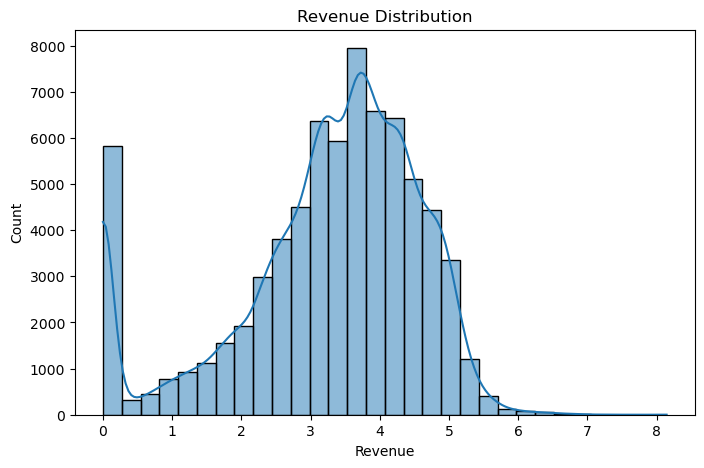

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(df["Log_Revenue"], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.show()

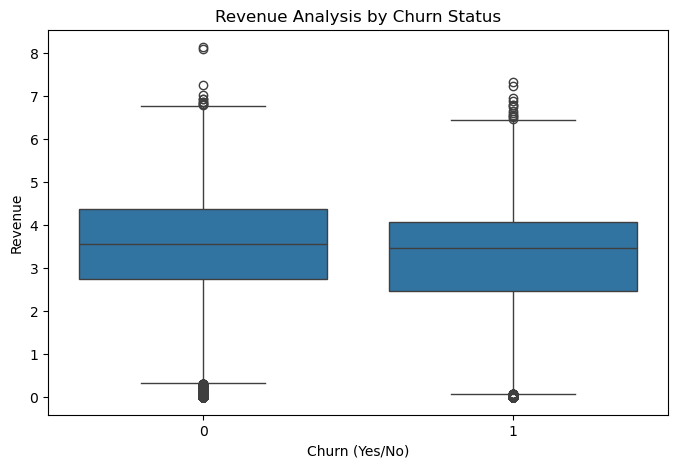

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["churn"], y=df["Log_Revenue"])
plt.title("Revenue Analysis by Churn Status")
plt.xlabel("Churn (Yes/No)")
plt.ylabel("Revenue")
plt.show()

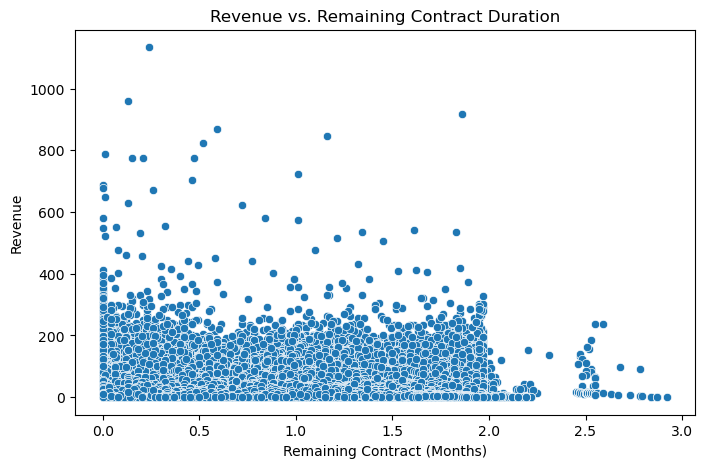

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["reamining_contract"], y=df["Revenue"])
plt.title("Revenue vs. Remaining Contract Duration")
plt.xlabel("Remaining Contract (Months)")
plt.ylabel("Revenue")
plt.show()

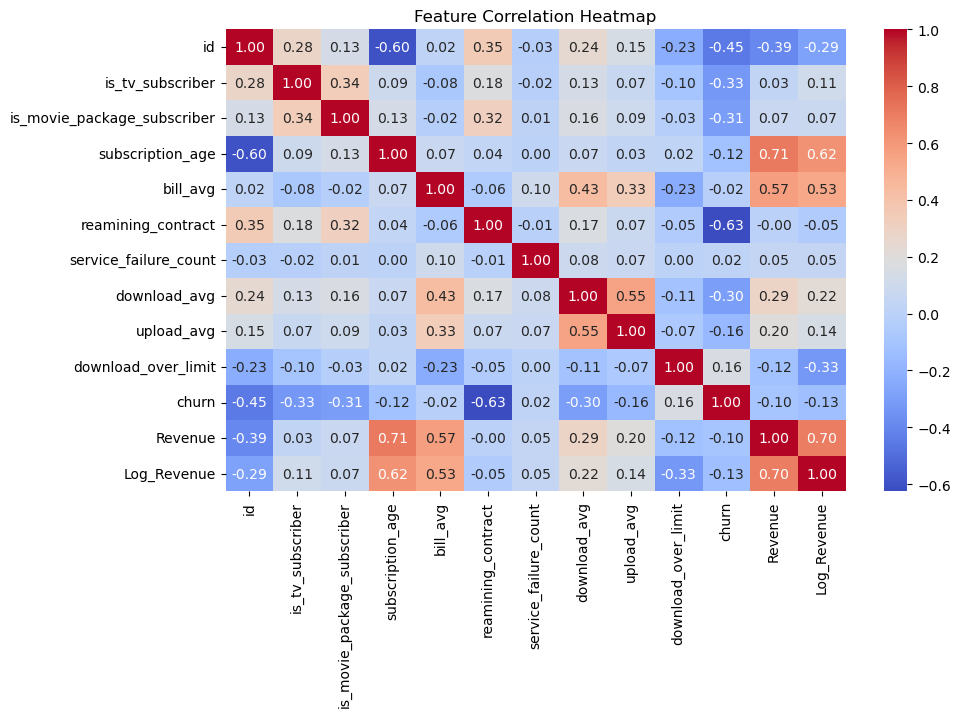

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
## from the heat map we can see that there are few strong correlations 
## subscription age and revenue which indicates that longer term customers contribute more revenue 
## bill average and revenue which is quite obvious that higher billing amt contributes to increased revenue 
## download avg and upload avg .


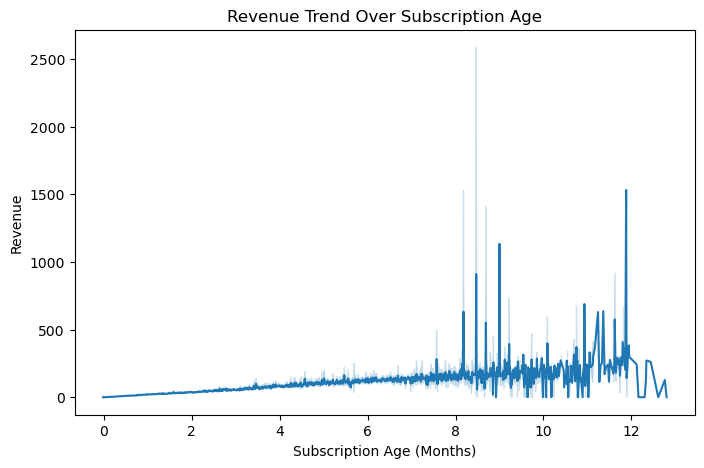

In [26]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df["subscription_age"], y=df["Revenue"])
plt.title("Revenue Trend Over Subscription Age")
plt.xlabel("Subscription Age (Months)")
plt.ylabel("Revenue")
plt.show()

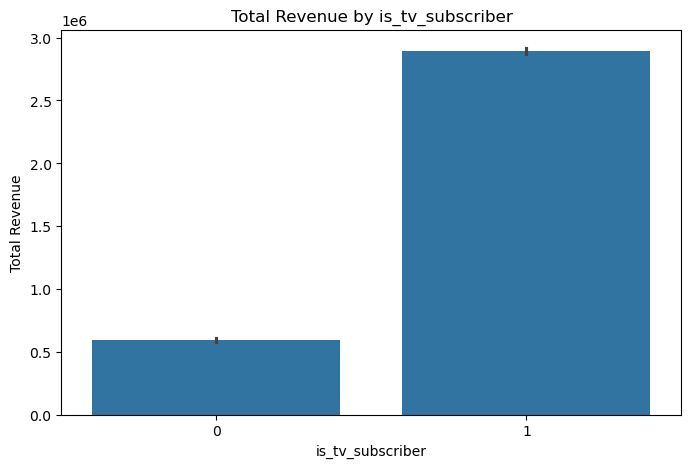

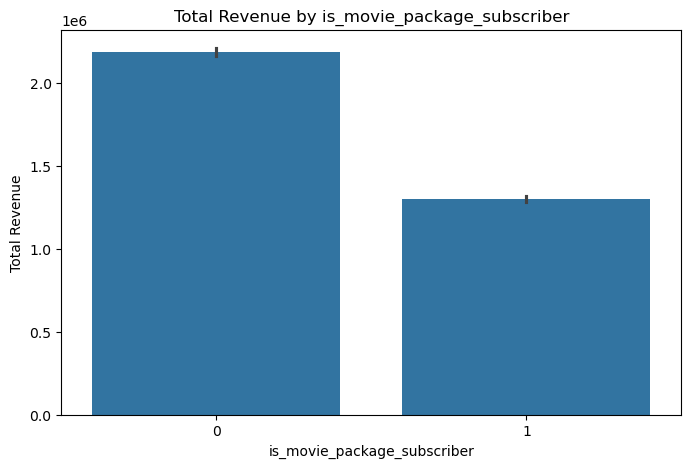

In [28]:
features = ["is_tv_subscriber", "is_movie_package_subscriber"]

for feature in features:
    plt.figure(figsize=(8,5))
    sns.barplot(x=df[feature], y=df["Revenue"], estimator=sum)
    plt.title(f"Total Revenue by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Total Revenue")
    plt.show()

/var/folders/yp/fhmczvyn2sx778505bnnqmgr0000gn/T/ipykernel_78704/2484944082.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["churn"] == 0]["Revenue"], label="Not Churned", shade=True)
/var/folders/yp/fhmczvyn2sx778505bnnqmgr0000gn/T/ipykernel_78704/2484944082.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["churn"] == 1]["Revenue"], label="Churned", shade=True)


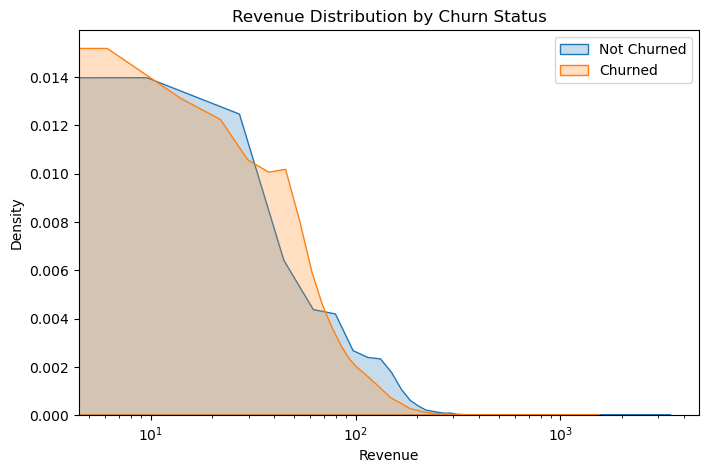

In [30]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df["churn"] == 0]["Revenue"], label="Not Churned", shade=True)
sns.kdeplot(df[df["churn"] == 1]["Revenue"], label="Churned", shade=True)
plt.xscale("log")
plt.title("Revenue Distribution by Churn Status")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

In [37]:
df["Revenue_per_Month"] = df["Revenue"] / df["subscription_age"]

In [39]:
from scipy.stats import ttest_ind

churned = df[df["churn"] == 1]["Revenue"]
not_churned = df[df["churn"] == 0]["Revenue"]

t_stat, p_value = ttest_ind(churned, not_churned)
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")

T-test Statistic: -28.215186594660405, P-value: 3.374813351482483e-174


In [41]:
df["Long_Term_Subscriber"] = df["subscription_age"].apply(lambda x: 1 if x > 24 else 0)


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X = df[["subscription_age", "bill_avg", "reamining_contract", "service_failure_count"]]
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.22374827280065754


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df[["bill_avg", "reamining_contract", "subscription_age", "service_failure_count"]]
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9283292978208233
